<a href="https://colab.research.google.com/github/bnv20/cakd3/blob/main/dl_classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.keras.__version__

'2.6.0'

In [8]:
from tensorflow.keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)


2121728/2110848 [==============================] - 0s 0us/step


In [9]:
len(train_data)

8982

In [10]:
len(test_data)

2246

In [11]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [12]:
import pandas as pd
pd.Series(train_labels).nunique()

46

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
len(x_train[0])

10000

In [15]:
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1. 
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels) 

In [16]:
len(one_hot_train_labels[0])

46

In [21]:
# keras 내장함수
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 2.5225 - accuracy: 0.5324 - val_loss: 1.7150 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3941 - accuracy: 0.7057 - val_loss: 1.3001 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0308 - accuracy: 0.7823 - val_loss: 1.1362 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8108 - accuracy: 0.8280 - val_loss: 1.0518 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6486 - accuracy: 0.8607 - val_loss: 0.9845 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5212 - accuracy: 0.8921 - val_loss: 0.9441 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4236 - accuracy: 0.9128 - val_loss: 0.9046 - val_accuracy: 0.8110
Epoch 8/20
16

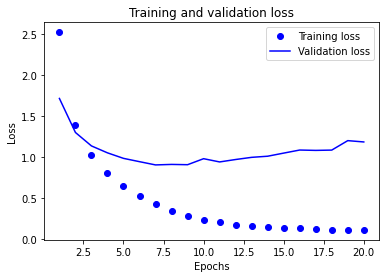

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label ='Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

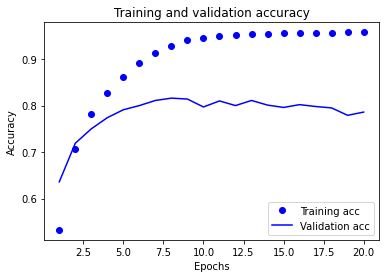

In [27]:
plt.clf() # 그래프를 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# 이 모델은 9번째 에포크 이후에 과대적합이 시작됩니다. 9번째 에포크로 새로운 모델을 훈련하고 테스트 세트로 평가
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_test,one_hot_test_labels))

Epoch 1/9
16/16 [==============================] - 1s 45ms/step - loss: 2.6510 - accuracy: 0.5183 - val_loss: 1.8342 - val_accuracy: 0.6211
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.4608 - accuracy: 0.7021 - val_loss: 1.4196 - val_accuracy: 0.6848
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0871 - accuracy: 0.7730 - val_loss: 1.2219 - val_accuracy: 0.7440
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8580 - accuracy: 0.8197 - val_loss: 1.1314 - val_accuracy: 0.7507
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6927 - accuracy: 0.8552 - val_loss: 1.0421 - val_accuracy: 0.7743
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.5519 - accuracy: 0.8856 - val_loss: 1.0194 - val_accuracy: 0.7711
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4431 - accuracy: 0.9068 - val_loss: 1.0039 - val_accuracy: 0.7729
Epoch 8/9
16/16 [===

In [29]:
results = model.evaluate(x_test,one_hot_test_labels)
results

71/71 [==============================] - 0s 1ms/step - loss: 0.9835 - accuracy: 0.7872


[0.9835342168807983, 0.7871772050857544]

In [30]:
predictions = model.predict(x_test)
predictions

array([[1.17838696e-04, 3.91379028e-04, 1.71837728e-05, ...,
        1.62265333e-05, 5.76680759e-05, 1.63083532e-05],
       [4.34117299e-03, 1.16314255e-02, 3.91956914e-04, ...,
        1.69122703e-02, 8.10641213e-05, 3.19649298e-05],
       [4.89567453e-03, 8.83551180e-01, 8.85573623e-04, ...,
        2.46427990e-05, 5.03789808e-04, 1.67361250e-05],
       ...,
       [3.29745759e-04, 4.95967222e-04, 1.80930452e-04, ...,
        1.00888528e-05, 3.29121976e-05, 1.53113451e-05],
       [3.48189496e-03, 4.29063290e-02, 1.07317034e-03, ...,
        7.86677934e-04, 5.81078115e-04, 2.65948678e-04],
       [6.36607234e-04, 6.56367660e-01, 5.00649447e-03, ...,
        2.53587605e-05, 8.49096614e-05, 1.24576090e-05]], dtype=float32)

In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

1.0000001

In [33]:
np.argmax(predictions[0])

3

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.1661 - accuracy: 0.3911 - val_loss: 2.5822 - val_accuracy: 0.4440
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.0145 - accuracy: 0.5591 - val_loss: 1.7296 - val_accuracy: 0.6360
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3798 - accuracy: 0.6790 - val_loss: 1.4506 - val_accuracy: 0.6610
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1720 - accuracy: 0.6973 - val_loss: 1.3927 - val_accuracy: 0.6620
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0412 - accuracy: 0.7310 - val_loss: 1.3672 - val_accuracy: 0.6800
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9416 - accuracy: 0.7669 - val_loss: 1.3274 - val_accuracy: 0.6980
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8561 - accuracy: 0.7942 - val_loss: 1.3592 - val_accuracy: 0.6960
Epoch 8/20
63/63 [=

검증 정확도의 최고 값은 8% 정도 감소. 그 이유는 많은 정보(46개 클래스의 분할 초평면 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려 했기 때문임. 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못함.


* N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 `Dense` 층의 크기는 N이어야 합니다.
* 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 `softmax` 활성화 함수를 사용해야 합니다.
* 이런 문제에는 항상 범주형 크로스엔트로피를 사용해야 합니다. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화합니다.
* 다중 분류에서 레이블을 다루는 두 가지 방법이 있습니다.
    * 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 `categorical_crossentropy` 손실 함수를 사용합니다.
    * 레이블을 정수로 인코딩하고 `sparse_categorical_crossentropy` 손실 함수를 사용합니다.
* 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 합니다.